# <font color=green> Pandas

<font color=green> **The objective of this project is twofold: to delve into the study of the Pandas library while advancing further in the exploration of Jupyter Notebook and Python. The project encompasses a major dataset and offers a range of exercises involving diverse datasets.** <font>

Several practices will be employed in this study:

1- Below certain commands, there will be a summary of their meanings.

2- All text will be written in English.

3- The data has been extracted from exercises on the Alura platform.

4- Each dataset will have a summary of its meaning.

# About

We were hired as data scientists for a real estate company. Our main role is to support the demands of the Machine Learning team and the Development team of this company.

To meet these demands, a Trello board was provided with the project's stages and tasks that we must perform. A database was also made available, which we will use to develop the project.

The database we will use to develop the project is a dataset containing information about various types of real estate in Rio de Janeiro, such as apartments, houses, commercial properties, among others.

In this dataset, we will find rental values for each property, condominium fees, property taxes (IPTU), and also their characteristics, such as the number of bedrooms, suites, parking spaces, etc.

Link to access the database: https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv

# To do list

1- The first step to start the project is to import the database and check some general characteristics, such as:

 - Number of rows and columns;
 - Which columns are in the database;
 - Explore the different existing columns;
 - Check the data types.

2- The process of Exploratory Data Analysis (EDA) involves seeking to understand how the data we want to analyze is structured.

It is an investigative process where we try to comprehend various characteristics, such as the values present in the columns, the types of data structures, checking if they are qualitative or quantitative data, and if there are missing or unusual values.

Therefore, at this moment, questions about the data are always welcome. They will guide the entire analysis process, and through available tools, like our beloved Pandas, we will seek answers.

Some questions we can ask at this moment:

 - What are the average rental values by property type?
 - What is the percentage of each property type in our database?
 
3- As our data will be used by the ML team to create a real estate pricing model, it is important for us to handle null data, as null data cannot be used in the training of ML models.
 
These records are inconsistent, so we must remove them from our database.

4- At this moment, the ML team wishes to evaluate only properties in specific scenarios, such as:

 - Apartments with 1 bedroom and rent less than R$ 1200;

 - Apartments with at least 2 bedrooms, rent less than R$ 3000, and an area larger than 70 m².

Based on this, we need to apply the necessary filters to obtain this specific information.

5- The company's website development team has requested the creation of two new numeric columns in our database. On the real estate website, they would like to present more summarized information regarding values. For this purpose, these columns will be important:

 - monthly_value: This column should contain the monthly expenses for each property, including rent and condominium fees;
 
 - annual_value: This column should contain the annual expenses per property, i.e., property tax (IPTU) plus 12 months of rent and condominium fees.

6- The development team requested the creation of two additional columns. However, this time they are categorical:

 - Description: This column should contain a summary of the main information about the properties that will be presented on the website: type of property, neighborhood, number of bedrooms, and parking spaces.
 
 - Has_suite: This should be a column that indicates only whether the property has suites or not, without considering the quantity.


# Loading Data

In [1]:
import pandas as pd

primary = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
primary_data = pd.read_csv(primary,sep=';')

# Printing infos

print("Primary Data size is: {}".format(primary_data.size))
print("Primary Data type is: {}".format(type(primary_data)))

# Checking dataframe

primary_data.head()

Primary Data size is: 296640
Primary Data type is: <class 'pandas.core.frame.DataFrame'>


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


# 1- General Characteristics

In [2]:
# Number of rows & Columns

print("Primary Data shape is: {}".format(primary_data.shape))

Primary Data shape is: (32960, 9)


In [3]:
# Name of Columns

primary_data.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [4]:
# Columns of different dtype

primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


# 2- Exploratory Data Analysis (EDA)

In [5]:
# What are the average rental values by property type?

primary_data.groupby('Tipo')[['Valor']].mean().sort_values('Valor', ascending=False)

,Valor
Tipo,
Prédio Inteiro,498637.239203
Indústria,120000.000000
Galpão/Depósito/Armazém,53407.062600
Terreno Padrão,32567.714286
Hotel,25000.000000
Loteamento/Condomínio,22000.000000
Conjunto Comercial/Sala,14715.045521
Casa Comercial,14478.264151
Loja/Salão,13769.646770


In [6]:
primary_data.query('Tipo == "Apartamento"')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [7]:
# What is the percentage of each property type in our database?

primary_data.Tipo.value_counts(normalize=True).round(5) * 100

Apartamento                    59.260
Conjunto Comercial/Sala        20.677
Loja/Salão                      4.326
Casa de Condomínio              3.022
Casa                            2.934
Quitinete                       2.536
Galpão/Depósito/Armazém         1.890
Flat                            1.444
Prédio Inteiro                  0.913
Casa Comercial                  0.804
Casa de Vila                    0.755
Loja Shopping/ Ct Comercial     0.749
Box/Garagem                     0.249
Terreno Padrão                  0.212
Loft                            0.155
Sítio                           0.030
Loteamento/Condomínio           0.015
Studio                          0.012
Hotel                           0.006
Chácara                         0.003
Pousada/Chalé                   0.003
Indústria                       0.003
Name: Tipo, dtype: float64

# 3- Treating Null Values

In [8]:
# Checking null value

primary_data.isnull().sum()

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64

In [9]:
# Removing null values

primary_data = primary_data.dropna()
primary_data.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

# 4- Evaluate Specific Scenarios

In [10]:
# Make new dataframes for specific scenarios

#1- Apartments with 1 bedroom and rent less than R$ 1200;

#2- Apartments with at least 2 bedrooms, rent less than R$ 3000, and an area larger than 70 m².

# Create a new dataframe for "Apartaments"

Apartments = primary_data.query('Tipo == "Apartamento"')
Apartments.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


In [11]:
# Creating a new dataframe for situation 1

Situation_01 = Apartments.query('Quartos >= 1 and Valor < 1200')
Situation_01

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
19,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
28,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Apartamento,Centro,1,0,0,27,750.0,371.0,19.0
77,Apartamento,Cachambi,2,0,0,60,1000.0,380.0,280.0
...,...,...,...,...,...,...,...,...,...
32728,Apartamento,Anil,2,1,0,48,1100.0,360.0,18.0
32787,Apartamento,Itanhangá,2,0,0,54,900.0,546.0,27.0
32930,Apartamento,Freguesia (Jacarepaguá),2,1,0,60,500.0,900.0,148.0
32950,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0


In [12]:
# Creating a new dataframe for situation 2

Situation_02 = Apartments.query('Quartos > 1 and Valor < 3000 and Area > 70')
Situation_02

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0
49,Apartamento,Barra da Tijuca,3,1,1,72,2350.0,600.0,70.0
51,Apartamento,Recreio dos Bandeirantes,3,1,2,92,2300.0,840.0,200.0
57,Apartamento,Recreio dos Bandeirantes,2,1,2,83,1600.0,1160.0,157.0
...,...,...,...,...,...,...,...,...,...
32933,Apartamento,Recreio dos Bandeirantes,2,1,1,105,2100.0,648.0,156.0
32934,Apartamento,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Apartamento,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Apartamento,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0


In [13]:
# Saving apartments dataframe

Apartments.to_csv('Dados/Apartaments.csv', sep=';', index=False)

# 5- Create New Columns

In [14]:
# monthly_value: This column should contain the monthly expenses for each property, including rent and condominium fees;

# annual_value: This column should contain the annual expenses per property, i.e., property tax (IPTU) plus 12 months of rent and condominium fees.

# Create column for monthly value

primary_data['monthly_value'] = primary_data.Valor + primary_data.Condominio

# Create column for annual value

primary_data['annual_value'] = (primary_data.monthly_value * 12) + primary_data.IPTU

In [15]:
primary_data

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,monthly_value,annual_value
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,54193.0,653346.0
...,...,...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1390.0,16728.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0


# 6- Create Categorical Columns

In [16]:
# Description: This column should contain a summary of the main information about the properties that will be presented on the website: type of property, neighborhood, number of bedrooms, and parking spaces.

# Has_suite: This should be a column that indicates only whether the property has suites or not, without considering the quantity.


# Create Description Column

primary_data['Description'] = primary_data.Tipo + ' In ' + primary_data.Bairro + ' Has ' + primary_data.Quartos.astype(str) + ' Bedroom And ' + primary_data.Vagas.astype(str) + ' Parking Space'

# Create has suite column

primary_data['Has_suite'] = primary_data.Suites.apply(lambda x: "Yes" if x > 0 else "No")


In [17]:
primary_data

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,monthly_value,annual_value,Description,Has_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete In Copacabana Has 1 Bedroom And 0 Pa...,No
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala In Barra da Tijuca Has...,No
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento In Centro Has 1 Bedroom And 0 Park...,No
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0,Apartamento In Cachambi Has 2 Bedroom And 0 Pa...,No
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,54193.0,653346.0,Conjunto Comercial/Sala In Centro Has 0 Bedroo...,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1390.0,16728.0,Apartamento In Méier Has 2 Bedroom And 0 Parki...,No
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0,Quitinete In Centro Has 0 Bedroom And 0 Parkin...,No
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0,Apartamento In Jacarepaguá Has 3 Bedroom And 1...,Yes
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0,Apartamento In São Francisco Xavier Has 2 Bedr...,No


# 7- Saving Dataframe

In [18]:
primary_data.to_csv('Dados/Primary_data.csv', index=False, sep=';')

pd.read_csv('Dados/Primary_data.csv', sep=';')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,monthly_value,annual_value,Description,Has_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete In Copacabana Has 1 Bedroom And 0 Pa...,No
1,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala In Barra da Tijuca Has...,No
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento In Centro Has 1 Bedroom And 0 Park...,No
3,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0,Apartamento In Cachambi Has 2 Bedroom And 0 Pa...,No
4,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,54193.0,653346.0,Conjunto Comercial/Sala In Centro Has 0 Bedroo...,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21147,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1390.0,16728.0,Apartamento In Méier Has 2 Bedroom And 0 Parki...,No
21148,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0,Quitinete In Centro Has 0 Bedroom And 0 Parkin...,No
21149,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0,Apartamento In Jacarepaguá Has 3 Bedroom And 1...,Yes
21150,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0,Apartamento In São Francisco Xavier Has 2 Bedr...,No


-----------------------------------------------------------------------

# Extra Exercises


-----------------------------------------------------------------------

# 1)

1- Calculate the average number of bedrooms per apartment.

2- Check how many unique neighborhoods exist in our database.

3- Analyze which neighborhoods have the highest average rental values.

4- Create a vertical bar chart that displays the top 5 neighborhoods with the highest average rental values.

In [19]:
# average number of rooms

Apartments.Quartos.mean()

2.5479569892473117

In [20]:
# Unique neighborhoods

Apartments.Bairro.unique()

array(['Centro', 'Cachambi', 'Grajaú', 'Lins de Vasconcelos',
       'Copacabana', 'Freguesia (Jacarepaguá)', 'Barra da Tijuca',
       'Tijuca', 'Ipanema', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Recreio dos Bandeirantes', 'Península', 'Méier', 'Vargem Pequena',
       'Botafogo', 'Maracanã', 'Jacarepaguá', 'Vila Valqueire', 'Gávea',
       'Cosme Velho', 'Todos os Santos', 'Itanhangá', 'Catete',
       'Jardim Carioca', 'Vila Isabel', 'Lagoa', 'Taquara',
       'Engenho Novo', 'Flamengo', 'Laranjeiras', 'Pilares', 'Água Santa',
       'Ilha do Governador', 'Vila da Penha', 'Praça Seca', 'São Conrado',
       'Pechincha', 'Jardim Botânico', 'Rio Comprido', 'Andaraí', 'Leme',
       'Glória', 'Curicica', 'Moneró', 'São Francisco Xavier', 'Camorim',
       'Urca', 'Praia da Bandeira', 'Saúde', 'Anil', 'Santa Teresa',
       'Fátima', 'Jardim Guanabara', 'Higienópolis', 'Praça da Bandeira',
       'Engenho de Dentro', 'Vargem Grande', 'São Cristóvão',
       'Campo Grande', 'Bons

In [21]:
# Highest average rental values

Highest_average = Apartments.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False).round(2)
Highest_average

,Valor
Bairro,
Joá,15500.00
Cidade Jardim,12000.00
Arpoador,11231.89
Ipanema,9287.55
Leblon,8531.31
...,...
Tomás Coelho,750.00
Cocotá,700.00
Vaz Lobo,600.00


<AxesSubplot: ylabel='Bairro'>

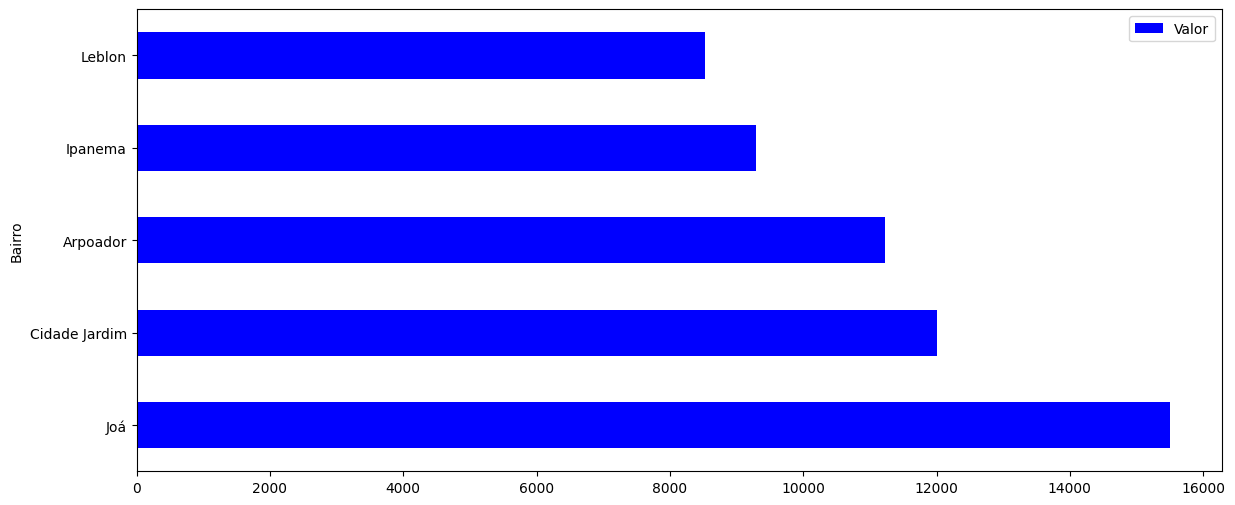

In [22]:
# Creat bar chart

Highest_average.head().plot(kind='barh', figsize=(14,6), color='b')

-----------------------------------------------------------------------

## 2)

To practice the methods learned throughout this lesson and also learn new ones, let's perform some analyses using a different CSV file: "alunos.csv."

**The "Alunos" DataFrame represents student data from a university, comprising four columns: "Nome" (Name), "Idade" (Age), "Notas" (Grade), and "Aprovado" (Approved).**

1- Import the "alunos.csv" file and store its content in a Pandas DataFrame.

2- Display the first 7 rows and the last 5 rows of the DataFrame.

3- Check the number of rows and columns in this DataFrame.

4- Explore the columns of the DataFrame and analyze the data types present in each column.

5- Check if the database has null values, and if so, handle these null values in the way you find most appropriate for the situation.

6- Students "Alice" and "Carlos" are no longer part of the class. Therefore, remove them from the database.

7- Apply a filter that selects only the students who have passed.

8- Save the DataFrame containing only the passing students to a CSV file named "alunos_aprovados.csv."

9- The students participated in an extracurricular activity and earned extra points. These extra points correspond to 40% of each student's current grade. Based on this, create a column called "Extra_points" that contains the extra points for each student, i.e., 40% of their current grade.

10- Create another column, called "Final_grades," which contains the sum of each student's grades and the extra points.

11- Since there was extra scoring, some students who had not passed before may have passed now. Based on this, create a column called "Passed_final" with the following values:

 - True: if the student is approved (final grade should be greater than or equal to 6);
 - False: if the student is not approved (final grade should be less than 6).

12- Make a selection and check which students had not been approved previously but have been approved after the addition of extra points.



In [23]:
# Importing alunos.csv

secondary = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
secondary_data = pd.read_csv(secondary, sep=',')

In [24]:
# Displaying first 7 rows & last 5 rows

display = pd.concat([secondary_data.head(7), secondary_data.tail(5)])
display

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True


In [25]:
# Number of rows and columns

secondary_data.shape

(18, 4)

In [26]:
# Handle null values

print(secondary_data.isnull().sum())

# The only values that are null is "Notas" a numerical one, so i decided to fill it with 0 value

secondary_data = secondary_data.fillna(0)
secondary_data

Nome        0
Idade       0
Notas       6
Aprovado    0
dtype: int64


,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,0.0,False


In [27]:
# Remove from database

secondary_data = secondary_data.drop(secondary_data.query('Nome == "Carlos" | Nome == "Alice"').index)
secondary_data

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


In [28]:
# Filter for those students who got approved.

Approved = secondary_data.query('Aprovado == True')
Approved

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [29]:
# Saving Students Approved.

Approved.to_csv('Dados/approved_students.csv', sep=';', index=False )

pd.read_csv('Dados/approved_students.csv', sep=';')

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Beto,21,10.0,True
2,Dara,21,7.0,True
3,Sthefanie,26,9.5,True
4,Mirla,25,9.0,True
5,Mylena,29,7.0,True
6,Nadia,34,8.0,True


In [30]:
# Create column for extra points

secondary_data['Extra_Points'] = secondary_data.Notas.apply(lambda x: x * 0.4)

secondary_data.head()

,Nome,Idade,Notas,Aprovado,Extra_Points
0,Ary,20,7.5,True,3.0
1,Ana,18,0.0,False,0.0
2,Cátia,27,2.5,False,1.0
3,Denis,18,5.0,False,2.0
4,Beto,21,10.0,True,4.0


In [31]:
# Create column for final grade

secondary_data['Final_Grade'] = secondary_data.Notas + secondary_data.Extra_Points

# Making so numbers cannot pass the value of 10

secondary_data['Final_Grade'] = secondary_data['Final_Grade'].apply(lambda x: 10 if x > 10 else x)

secondary_data

,Nome,Idade,Notas,Aprovado,Extra_Points,Final_Grade
0,Ary,20,7.5,True,3.0,10.0
1,Ana,18,0.0,False,0.0,0.0
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,10.0
5,Bruna,23,0.0,False,0.0,0.0
6,Dara,21,7.0,True,2.8,9.8
9,Vitor,28,0.0,False,0.0,0.0
10,Daniel,21,0.0,False,0.0,0.0
11,Igor,24,4.5,False,1.8,6.3


In [35]:
# Creating columns for students that pass with the extra points

secondary_data['Passed_final'] = secondary_data['Final_Grade'].apply(lambda x: True if x > 6 else False)
secondary_data

,Nome,Idade,Notas,Aprovado,Extra_Points,Final_Grade,Passed_final
0,Ary,20,7.5,True,3.0,10.0,True
1,Ana,18,0.0,False,0.0,0.0,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,10.0,True
5,Bruna,23,0.0,False,0.0,0.0,False
6,Dara,21,7.0,True,2.8,9.8,True
9,Vitor,28,0.0,False,0.0,0.0,False
10,Daniel,21,0.0,False,0.0,0.0,False
11,Igor,24,4.5,False,1.8,6.3,True


In [41]:
# Checking what students didn't get approved before the final grade but got approved now.

result = secondary_data.query('Aprovado == False and Passed_final == True')

result

,Nome,Idade,Notas,Aprovado,Extra_Points,Final_Grade,Passed_final
3,Denis,18,5.0,False,2.0,7.0,True
11,Igor,24,4.5,False,1.8,6.3,True


# End of exercises